In [55]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml

In [56]:
!pip install yfinance

In [57]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf

In [58]:
tesla = yf.Ticker("TSLA")
# tesla.info

In [59]:
tesla_data = tesla.history(period='max')
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [60]:
url = "https://companiesmarketcap.com/inr/tesla/revenue/"
html_data = requests.get(url).text
# html_data

In [61]:
soup = BeautifulSoup(html_data,'html5lib')
# soup

In [62]:
tesla_revenue = pd.DataFrame(columns=["Year","Revenue"])

In [63]:
# soup.find('tbody').find_all('tr')

In [64]:
((soup.find('tbody').find_all('tr')[0]).find_all('td'))[0].text

'2024 (TTM) '

In [65]:
import numpy as np

In [104]:
year_list = []
revenue_list = []
for i in soup.find('tbody').find_all('tr'):
        year = i.find_all('td')[0].text
        revenue = (i.find_all('td')[1].text)
        year_list.append(year)
        revenue_list.append(revenue.replace('₹',''))
tesla_revenue = pd.DataFrame({'Year':year_list,'Revenue':revenue_list})
tesla_revenue.head(5)

,Year,Revenue
0,2024 (TTM),7.939 T
1,2023,8.056 T
2,2022,6.740 T
3,2021,4.006 T
4,2020,2.306 T


In [105]:
b = tesla_revenue['Revenue']
for i in range(0,len(b)):
    if b[i][-1] == "T":

        b[i] = float(b[i][0:len(b[i])-1])*(10**12)
    elif b[i][-1] == 'B':
        b[i] = float(b[i][0:len(b[i])-1])*(10**9)

7.939 
8.056 
6.740 
4.006 
2.306 
1.752 
1.500 


In [107]:
tesla_revenue['Revenue'] = b/(10**6)
tesla_revenue #converted to millions

,Year,Revenue
0,2024 (TTM),7939000.0
1,2023,8056000.0
2,2022,6740000.0
3,2021,4006000.0
4,2020,2306000.0
5,2019,1752000.0
6,2018,1500000.0
7,2017,750800.0
8,2016,475690.0
9,2015,268870.0


In [109]:
game_stop = yf.Ticker('GME')
gme_data = game_stop.history('max')
gme_data = gme_data.reset_index()
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [110]:
url1 = "https://companiesmarketcap.com/inr/gamestop/revenue/"

response_gme = requests.get(url).text
# response_gme

In [111]:
gme_revenue = pd.DataFrame({"Year", "Revenue"})

In [112]:
soup_gme = BeautifulSoup(response_gme,'html.parser')
# soup_gme

In [113]:
soup_gme.find('tbody').find_all('tr')[0]

<tr><td><span class="year">2024</span> (TTM) <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="1 Jul 2023 - 30 Jun 2024"/></td><td>₹7.939 T</td><td class="percentage-red">-1.45%</td></tr>

In [128]:
revenue_gme = []
year_gme = []
for i in soup_gme.find('tbody').find_all('tr'):
    year = i.find_all('td')[0].text
    revenue = i.find_all('td')[1].text
    revenue_gme.append(revenue.replace('₹',''))
    year_gme.append(year)

gme_revenue = pd.DataFrame({"Year":year_gme, "Revenue":revenue_gme})
gme_revenue.tail(5)

,Year,Revenue
11,2013,124.39 B
12,2012,22.62 B
13,2011,10.80 B
14,2010,5.23 B
15,2009,5.19 B


In [129]:
b = gme_revenue['Revenue']
for i in range(0,len(b)):
    if b[i][-1] == "T":
        b[i] = float(b[i][0:len(b[i])-1])*(10**12)
    elif b[i][-1] == 'B':
        b[i] = float(b[i][0:len(b[i])-1])*(10**9)
gme_revenue['Revenue'] = b/(10**6) #converted to millions

In [130]:
gme_revenue

,Year,Revenue
0,2024 (TTM),7939000.0
1,2023,8056000.0
2,2022,6740000.0
3,2021,4006000.0
4,2020,2306000.0
5,2019,1752000.0
6,2018,1500000.0
7,2017,750800.0
8,2016,475690.0
9,2015,268870.0


In [75]:
!pip install matplotlib

In [115]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [97]:
def make_graph(stock_data):
    fig = go.Figure(data=[go.Candlestick(x=stock_data['Date'],
                open=stock_data['AAPL.Open'],
                high=stock_data['AAPL.High'],
                low=stock_data['AAPL.Low'],
                close=stock_data['AAPL.Close'])])
    
    fig.show()

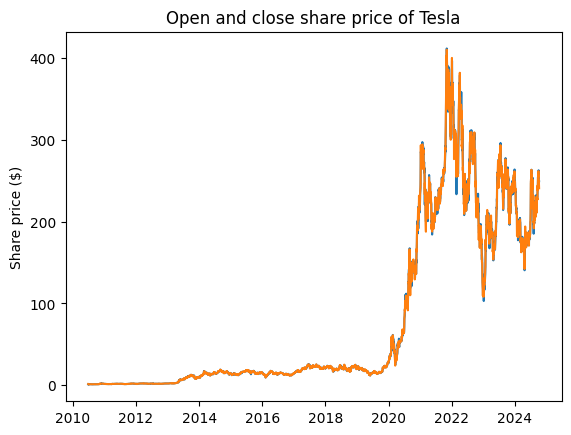

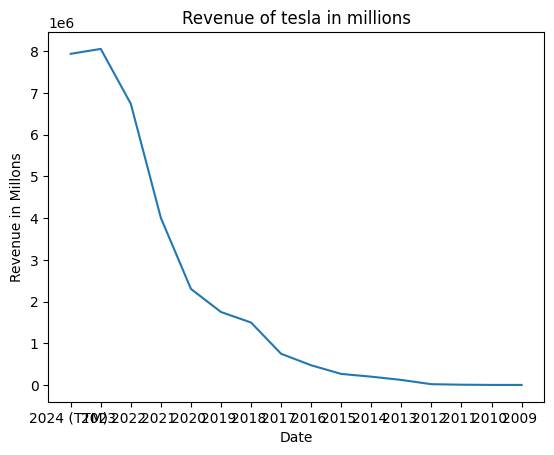

In [124]:
import matplotlib.pyplot as plt
plt.plot(tesla_data['Date'],tesla_data['Open'])
plt.plot(tesla_data['Date'],tesla_data['Close'])
plt.ylabel('Share price ($)')
plt.title('Open and close share price of Tesla')
plt.show()
plt.plot(tesla_revenue['Year'],tesla_revenue['Revenue'])
plt.title('Revenue of tesla in millions')
plt.xlabel("Date")
plt.ylabel("Revenue in Millons")
plt.show()


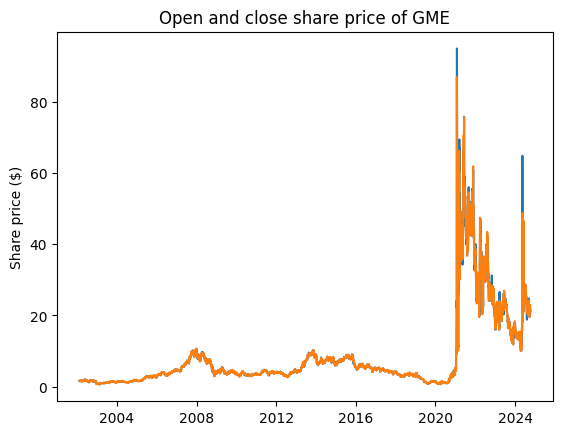

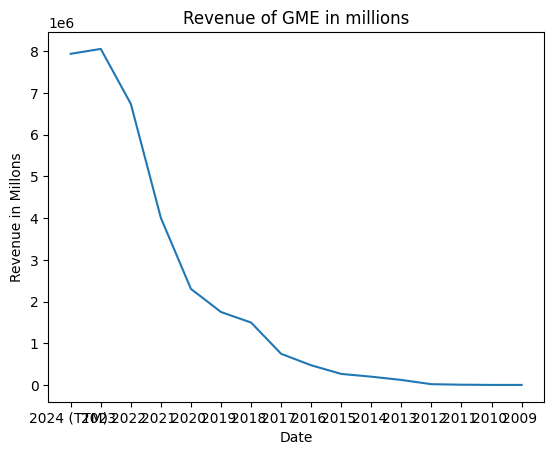

In [131]:
plt.plot(gme_data['Date'],gme_data['Open'])
plt.plot(gme_data['Date'],gme_data['Close'])
plt.ylabel('Share price ($)')
plt.title('Open and close share price of GME')
plt.show()
plt.plot(gme_revenue['Year'],gme_revenue['Revenue'])
plt.title('Revenue of GME in millions')
plt.xlabel("Date")
plt.ylabel("Revenue in Millons")
plt.show()